# Cargar Dataset
## 1.Inicializando Librerías
Para realizar nuestro trabajo utilizaremos las siguientes librerías: Usaremos Numpy para poder utilizar su estructura de arreglos; con Matplotlib graficaremos la información de forma más sencilla. Por último, utilizaremos pandas para poder leer el dataset propuesto por el trabajo y para almacenarlo en su estructura de dataframes.

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

## 2.Lectura del Dataset
El trabajo propuesto por el curso de machine learning nos plantea entrenar un modelo que pueda clasificar correctamente si un correo electrónico es de categoria spam o lo contrario. Para ello se nos entregó un dataset clasico de SPAM OR NOT SPAM, que contiene 2500 'ham' (es decir, no spam) y 500 correos electrónicos no deseados en el conjunto de datos. También puede notar que todos los números y URL se convirtieron en cadenas como NUMBER y URL respectivamente. Este es el conjunto de datos simplificado de spam y ham. Este dataset contiene las siguientes variables:


In [3]:
df = pd.read_csv('dataset.csv', encoding = "ISO-8859-1")

Una vez hayamos cargado el dataset, procedemos a visualizar los datos.

## 3. Análisis Exploratorio y Tratamiento de Datos

### 3.1- Visualizacion Corta del Dataframe
Lo primero que se decidió hacer fue ver el estado del dataframe, por lo que usamos la función head() de pandas. Se puede visualizar todas las columnas, y las primeras 5 filas.


In [4]:
df.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


### 3.2- Magnitud del Dataset
Luego, para tener una idea de la magnitud del dataset con el que se está trabajando, usamos la función shape() de Pandas para que nos retorne el número de filas y columnas de dicho dataset. El primer axis son el numero de filas y la segunda de las columnas. Tambien mostraremos como estan estructurados nuestros datos. Es decir la distribución de los valores del dominio de nuestro dataset; 0 para no SPAM y 1 para SPAM.

In [5]:
df.shape

(3000, 2)

In [6]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

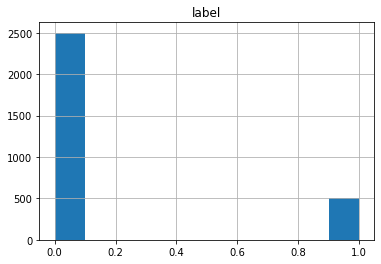

In [7]:
df.hist();

### 3.3 - Valores Nulos
Es un paso crucial ver si existen valores nulos en el dataset que se va a usar,por lo tanto, usando la función isna(), mas sumando todo con sum(), podemos sumar la cantidad de valores nulos por cada columnas de DF. En este caso, podemos ver que la de los correos tiene 1 valor unico.

In [8]:
df.isna().sum() #Detección de valores nulos

email    1
label    0
dtype: int64

### 3.4 Tipos de Atributos
Es muy importante, antes de empezar a trabajar con la data de un dataset, saber qué tipos de atributos contiene. Para esto, se hizo uso de la función dtypes() de pandas, que , por cada columna, me retorna su tipo de dato.

In [9]:
df.dtypes

email    object
label     int64
dtype: object


Podemos ver que la columna importante de 'email' esta en tipo Object, lo que nos dice que el dataset no está listo para poder entrenarlo. Esto se arreglara posteriormente.

Para poder ver las estadísticas de las columnas numéricas, se hizo uso de la función describe() de pandas una vez más. Como podemos ver, solo toma en cuenta las columnas que están en tipos numéricos, es decir int o float. En este caso es solo los labels (clases).

In [10]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### 3.5 Distribución Aleatoria de los datos
Usando la función Shuffle de Sklearn distribuiremos los datos para que los datos no esten ordenados y podemos partirlos posteriormente.

In [11]:
df = shuffle(df)

## 4 - Tratamiento de Datos


### 4.1 - Descartando Valores Faltantes
Como se analizó previamente, en la sección de exploración de datos, había un registro con valor nulo en la columna de 'email'. Para solucionar esto, como nos dimos cuenta que habían suficientes registros en el dataset, y que solo era un registro, decidimos descartar esa filas que contenía dicho valor nulo. Entonces, lo que decidimos hacer fue usar la funcion dropna() de libreria Pandas, que fue cargada previamente.

In [12]:
df = df.dropna()

Hacemos una simple verificacion que efectivamente se borro el registro nulo y podemos ver que efectivamente lo hizo.

In [13]:
df.isna().sum()

email    0
label    0
dtype: int64

### 4.2 - Bag of Words 
Descripcion aqui y mas floro

In [14]:
X = df['email']
y = df['label']


2999


In [ ]:
X = X.str.lower()
X = X.str.replace(r'\r', ' ')
X = X.str.replace(r'\n', ' ')
X = X.str.replace('[^a-zA-Z0-9]', ' ')


In [ ]:
x

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
xtrain = vec.fit_transform(xtrain)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(xtrain, ytrain)

In [ ]:
ypred = clf.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(ytest, ypred)

In [ ]:
accuracy_score(ytest, ypred)

In [ ]:
clf.predict(['porn porn porn porn'])

### 4.3 - PCA

Disminuiremos el número de columnas, con fin de buscar optimizar los tiempos de ejecución de nuestros modelos.

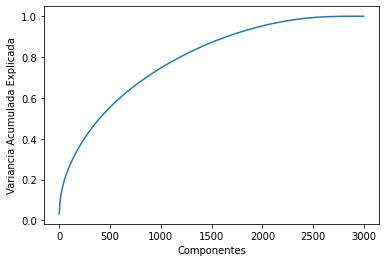

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(emails_body_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Variancia Acumulada Explicada');

In [17]:
pca = PCA(n_components=2000)
principalComponents = pca.fit_transform(emails_body_df)
emails_body_df_w_pca = pd.DataFrame(data = principalComponents)

In [18]:
emails_body_df_w_pca['label'] = labels

In [19]:
emails_body_df_w_pca['label'].value_counts();

### 4.4 Dataset Preparation

Partimos el dataset en data de entrenamiento y de prueba para poder empezar a enviarlos a los modelos escogidos dentro del alcance de este trabajo.

In [20]:
x = emails_body_df_w_pca.iloc[:,:-1]
y = emails_body_df_w_pca.iloc[:,-1:]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state=0, shuffle = True)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
673,0.225544,-0.032194,-0.036821,-0.043390,-0.019506,0.022213,0.018980,-0.009083,-0.013247,-0.012795,...,0.000001,0.005762,-0.004134,0.006936,0.008717,-0.002595,0.020159,-0.005545,-0.004921,-0.000781
1201,-0.054280,-0.011175,0.008645,-0.027042,0.053446,-0.039469,0.056983,-0.023830,0.004002,-0.024438,...,0.008060,-0.008805,-0.003908,0.008121,-0.012282,-0.003712,0.000490,0.008874,-0.007407,-0.000834
2685,0.039988,-0.033157,0.001244,-0.053134,0.071725,-0.076243,-0.043172,-0.032991,-0.033750,-0.070519,...,-0.004893,-0.002087,0.008225,-0.000059,0.001476,-0.001416,0.001451,-0.001819,0.006683,-0.005304
424,-0.118299,0.023749,-0.033126,-0.038755,0.013454,0.016231,0.008462,0.069860,-0.022440,0.054528,...,0.007376,-0.002787,0.005422,0.005087,-0.002106,0.003555,-0.003076,0.000352,0.000864,-0.006290
325,-0.099845,-0.039973,0.010115,-0.040981,0.044389,-0.017960,-0.050414,0.046604,0.044589,-0.051767,...,0.001119,0.001223,0.008547,0.004438,0.005423,-0.002487,-0.003503,0.003891,0.001105,-0.003610


## 5. - Elección de Modelos a Utilizar

### 5.1 - K-Nearest Neighbors Model
Se seleccionó el algoritmo KNN porque es uno de los algoritmos de clasificación más simples y es uno de los algoritmos de aprendizaje más utilizados.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 0
knn = KNeighborsClassifier(n_neighbors=neighbors)

In [ ]:
acc = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
knn_mod = KNeighborsClassifier(n_neighbors = 4).fit(X_train,Y_train)
y2_model = knn_mod.predict(X_test)
accuracy_score(Y_test, y2_model)

### 5.2 - Decision Tree Model
Se escogió el modelo Decision Tree para contar con un modelo simple, la finalidad principal de usar este modelo es ver qué impacto tiene con nuestro dataset y poder compararlo con los demás modelos a usar

### 5.3 - XGBoost Model
Siguiendo la linea de la investigación realizada, encontramos en el modelo de XGboost una opción más sofisticada y mas controlable de Logistic Regression. Por ello la proponemos como una opción mejorada del modelo anterior que nos permita jugar más con los hiper-parámetros.

In [48]:
dataTest = [df.iloc[600,0].lower(),df.iloc[601,0].lower()]
testMSG = vec_datos.transform(dataTest)

In [49]:
print(testMSG.toarray()) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
readyMSG= pd.DataFrame(testMSG.toarray(), columns=tf_idf_dataframe_smooth.iloc[:,:-1].columns)

In [51]:
readyMSG.iloc[1,:].unique()

array([0.        , 0.0996608 , 0.15291666, 0.12665847, 0.07162407,
       0.05288198, 0.04634545, 0.09095977, 0.09497229, 0.04964887,
       0.13155271, 0.10062762, 0.12571277, 0.11029547, 0.17060888,
       0.07050765, 0.06239904, 0.08250553, 0.15635913, 0.08984335,
       0.07772222, 0.09217338, 0.05164943, 0.09435241, 0.07348653,
       0.13843642, 0.05151133, 0.10052529, 0.06998126, 0.06851172,
       0.08315438, 0.07525443, 0.06577635, 0.07077849, 0.0523612 ,
       0.04697623, 0.07914186, 0.03989113, 0.02777771, 0.12865186,
       0.09847756, 0.06398572, 0.04019304, 0.1545588 , 0.05491879,
       0.0561085 , 0.16636553, 0.06152702, 0.05805309, 0.0673953 ,
       0.1159508 , 0.05639809, 0.07787758, 0.19670406, 0.1031706 ,
       0.177436  , 0.18434677, 0.14385816, 0.06195622, 0.04456625,
       0.04520715, 0.05207212, 0.07191772, 0.19420384, 0.14976495,
       0.19695513, 0.08455032, 0.20634119, 0.05007618, 0.04037737,
       0.18191954, 0.09721328, 0.07865242, 0.01643506, 0.10428

In [52]:
pca2 = PCA(n_components=2)

principalComponents2 = pca2.fit_transform(readyMSG)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])

In [53]:
print(principalDf2)

   principal component 1  principal component 2
0               0.669507           1.059496e-16
1              -0.669507           1.059496e-16


In [54]:
principalDf2.iloc[1,:]

principal component 1   -6.695069e-01
principal component 2    1.059496e-16
Name: 1, dtype: float64